# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [67]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv
import pprint
from matplotlib.widgets import TextBox

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [68]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


615

In [69]:
cities

['albany',
 'hilo',
 'butaritari',
 'punta arenas',
 'karacabey',
 'coolum beach',
 'portmore',
 'leningradskiy',
 'attawapiskat',
 'saldanha',
 'sergeyevka',
 'cape town',
 'codrington',
 'upernavik',
 'kapaa',
 'bluff',
 'monrovia',
 'beringovskiy',
 'ushuaia',
 'dongsheng',
 'puerto ayora',
 'mataura',
 'nikolskoye',
 'busselton',
 'inhambane',
 'klaksvik',
 'san vicente',
 'saskylakh',
 'narsaq',
 'belushya guba',
 'nanortalik',
 'grindavik',
 'zubtsov',
 'ust-nera',
 'champerico',
 'hobart',
 'atuona',
 'barentsburg',
 'vaini',
 'cherskiy',
 'matongo',
 'birao',
 'hermanus',
 'dalby',
 'nefteyugansk',
 'port blair',
 'rikitea',
 'longyearbyen',
 'charters towers',
 'cururupu',
 'kavieng',
 'kaitangata',
 'port alfred',
 'barrow',
 'cacu',
 'lukulu',
 'thompson',
 'tomatlan',
 'bodden town',
 'viransehir',
 'garissa',
 'dikson',
 'bafoulabe',
 'louisbourg',
 'baykit',
 'corn island',
 'khatanga',
 'turukhansk',
 'olafsvik',
 'bambous virieux',
 'khalkhal',
 'kwinana',
 'zaysan',
 '

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [70]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
citya = "albany"
units = "imperial"

# Build query URL
query_urla = f"{url}appid={api_key}&units={units}&q={citya}"
query_urla

'http://api.openweathermap.org/data/2.5/weather?appid=41bb7b5221d160d1eb4a96b5b260ae0a&units=imperial&q=albany'

In [71]:
# Get weather data
weather_response = requests.get(query_urla)
dataa = weather_response.json()


# Get the temperature from the response
print(f"The weather API responded with: {dataa}.")

The weather API responded with: {'coord': {'lon': -73.75, 'lat': 42.65}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 8.53, 'pressure': 1030, 'humidity': 66, 'temp_min': 6.8, 'temp_max': 12.02}, 'visibility': 16093, 'wind': {'speed': 8.05, 'deg': 310}, 'clouds': {'all': 20}, 'dt': 1547265420, 'sys': {'type': 1, 'id': 3273, 'message': 0.0039, 'country': 'US', 'sunrise': 1547295820, 'sunset': 1547329399}, 'id': 5106834, 'name': 'Albany', 'cod': 200}.


In [72]:
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(dataa)

{   'base': 'stations',
    'clouds': {'all': 20},
    'cod': 200,
    'coord': {'lat': 42.65, 'lon': -73.75},
    'dt': 1547265420,
    'id': 5106834,
    'main': {   'humidity': 66,
                'pressure': 1030,
                'temp': 8.53,
                'temp_max': 12.02,
                'temp_min': 6.8},
    'name': 'Albany',
    'sys': {   'country': 'US',
               'id': 3273,
               'message': 0.0039,
               'sunrise': 1547295820,
               'sunset': 1547329399,
               'type': 1},
    'visibility': 16093,
    'weather': [   {   'description': 'few clouds',
                       'icon': '02n',
                       'id': 801,
                       'main': 'Clouds'}],
    'wind': {'deg': 310, 'speed': 8.05}}


In [73]:
# tempa = dataa['main']['temp']
# lata = dataa['coord']['lat']
# humiditya = dataa['main']['humidity']
# cloudsa = dataa['clouds']['all'] 
# winda = dataa['wind']['speed']


In [74]:
# tempa

In [75]:
# humiditya

In [76]:
# cloudsa

In [77]:
# winda

In [78]:
#lata

In [79]:

# set up lists to hold reponse info

lat = []
temp = []
humidity = []
wind = []
clouds = []
units = "imperial"
city_name = []

query_url = f"{url}appid={api_key}&units={units}&q="
query_url

for city in cities:
    try:
        weather_response = requests.get(query_url + city)
        data = weather_response.json()
        print(city, data['id'])
        city_name.append(city)
#     pp = pprint.PrettyPrinter(indent=4)
#     pp.pprint(data)
        lat.append(data['coord']['lat'])
        temp.append(data['main']['temp'])
        humidity.append(data['main']['humidity'])
        clouds.append(data['clouds']['all'])
        wind.append(data['wind']['speed'])
    except:
        print(city)

# print(f"The latitude information received is: {lat}")
# print(f"The temperature information received is: {temp}")

albany 5106834
hilo 5855927
butaritari 2110227
punta arenas
karacabey
coolum beach
portmore
leningradskiy 2123814
attawapiskat
saldanha 2737599
sergeyevka 1519385
cape town 3369157
codrington 2160063
upernavik 3418910
kapaa 5848280
bluff 2175403
monrovia
beringovskiy 2126710
ushuaia 3833367
dongsheng
puerto ayora 3652764
mataura
nikolskoye
busselton 2075265
inhambane 1045114
klaksvik 2618795
san vicente
saskylakh 2017155
narsaq
belushya guba
nanortalik 3421765
grindavik 3416888
zubtsov
ust-nera
champerico
hobart 2163355
atuona
barentsburg
vaini
cherskiy
matongo
birao
hermanus 3366880
dalby 2169535
nefteyugansk
port blair 1259385
rikitea
longyearbyen 2729907
charters towers
cururupu 3401148
kavieng 2094342
kaitangata 2208248
port alfred
barrow 3833859
cacu
lukulu
thompson
tomatlan
bodden town 3580733
viransehir
garissa
dikson 1507390
bafoulabe
louisbourg
baykit
corn island
khatanga
turukhansk 1488903
olafsvik
bambous virieux 1106677
khalkhal
kwinana
zaysan
amderma
mabaruma
bekhtery
bred

mutis 3689325
hofn 2630299
bud 7626370
abu kamal 174448
huarmey 3939168
majene 1636806
zyryanka 2119283
liverpool 2644210
bom jesus 3405304
san francisco 5391959
mankera 2322911
pokhara 1282898
rungata
athmallik 1268610
nicoya 3622716
hurghada
livermore 5367440
chikwawa 931070
waipawa 2185329
genhe 2037252
lugazi 229911
yar-sale 1486321
souillac 3026644
zolotinka
vanimo 2084442
carauari 3664659
marawi 1701054
kindu 212902
tura 1254046
dharmanagar 1272852
pleasant point 2184512
alice springs 2077895
tazovskiy 1489853
caranavi 3922037
ust-maya 2013918
ancud 3899695
ballina 2966778
lopsmarka 3146942
dowa 929977
nerchinskiy zavod 2019323
nagornyy
kirakira 2178753
gongzhuling 2037222
sao sebastiao 3397893
ruteng 1629380


In [85]:
weather_dict = {
    'city': city_name,
    'lat': lat,
    'temp F': temp, 
    'humidity %': humidity,
    'clouds %': clouds,
    'wind MPH': wind
}

weather_data= pd.DataFrame(weather_dict)
weather_data.head()

,city,lat,temp F,humidity %,clouds %,wind MPH
0,albany,42.65,8.53,66,20,8.05
1,hilo,19.71,73.04,81,90,8.05
2,butaritari,3.07,83.63,100,76,12.77
3,leningradskiy,69.38,-14.20,88,8,14.45
4,saldanha,41.42,19.37,86,0,3.49


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [86]:
weather_data.to_csv('../weather_data.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [87]:
weather_data.head()


,city,lat,temp F,humidity %,clouds %,wind MPH
0,albany,42.65,8.53,66,20,8.05
1,hilo,19.71,73.04,81,90,8.05
2,butaritari,3.07,83.63,100,76,12.77
3,leningradskiy,69.38,-14.20,88,8,14.45
4,saldanha,41.42,19.37,86,0,3.49


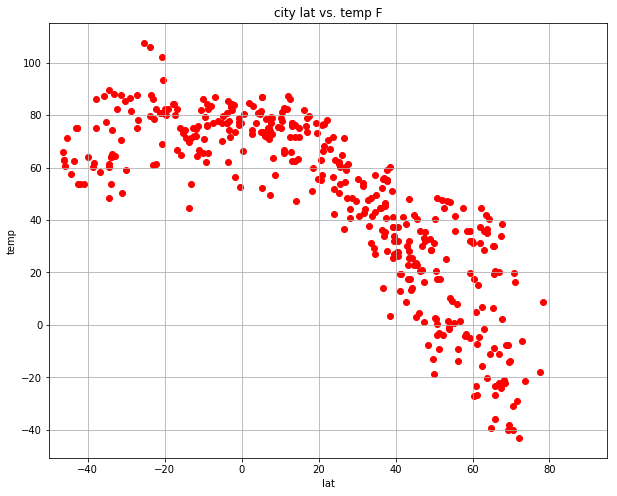

<Figure size 432x288 with 0 Axes>

In [88]:

plot_titlefig,ax = plt.subplots(figsize=(10,8))

scatter = ax.scatter(weather_data['lat'],weather_data['temp F'], c='red', cmap=plt.cm.coolwarm,)
plt.title('city lat vs. temp F')
plt.ylabel('temp')
plt.xlabel('lat')
ax.set_xlim(-50,95)
plt.grid()
plt.show()
plt.savefig('temp.png')




#### Latitude vs. Humidity Plot

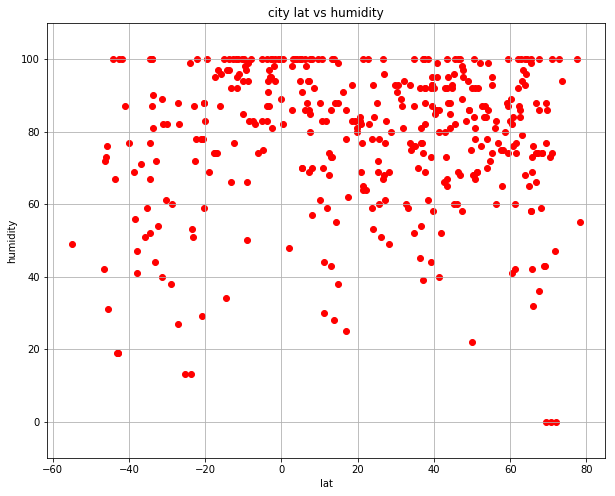

<Figure size 432x288 with 0 Axes>

In [91]:

fig,ax = plt.subplots(figsize=(10,8))

scatter = ax.scatter(weather_data['lat'],weather_data['humidity %'], c='r')
plt.title('city lat vs humidity')
plt.xlabel('lat')
plt.ylabel('humidity')
ax.set_ylim(-10,110)
plt.grid()
plt.show()
plt.savefig('humidity.png')



#### Latitude vs. Cloudiness Plot

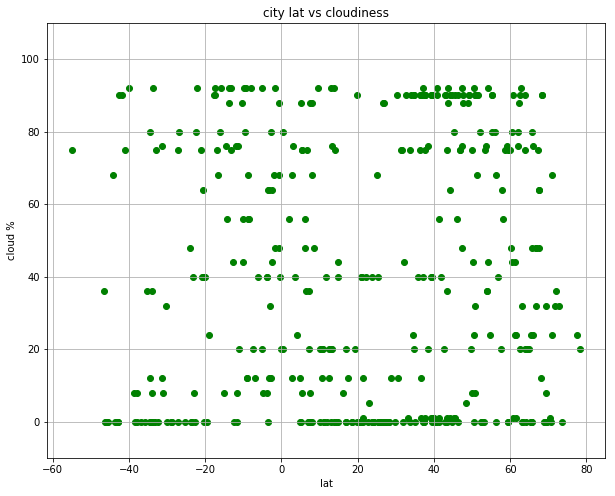

<Figure size 432x288 with 0 Axes>

In [96]:

fig,ax = plt.subplots(figsize=(10,8))

scatter = ax.scatter(weather_data['lat'],weather_data['clouds %'], c='g')
plt.title('city lat vs cloudiness')
plt.xlabel('lat')
plt.ylabel('cloud %')
ax.set_ylim(-10,110)
plt.grid()
plt.show()
plt.savefig('cloudiness.png')

#### Latitude vs. Wind Speed Plot

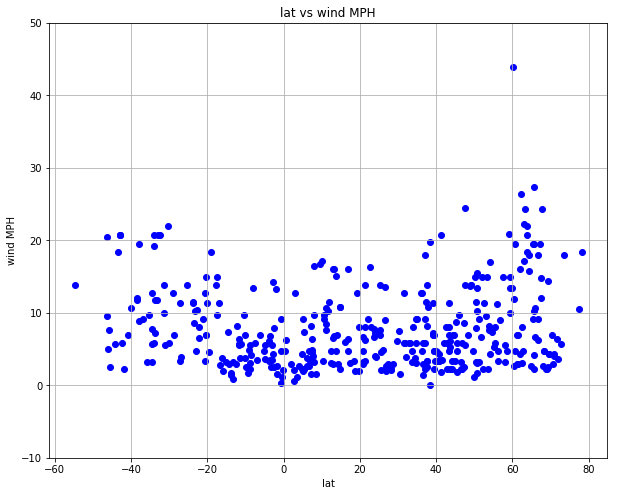

<Figure size 432x288 with 0 Axes>

In [100]:

fig,ax = plt.subplots(figsize=(10,8))

scatter = ax.scatter(weather_data['lat'],weather_data['wind MPH'], c='blue')
plt.title('lat vs wind MPH')
plt.xlabel('lat')
plt.ylabel('wind MPH')
ax.set_ylim(-10,50)
plt.grid()
plt.show()
plt.savefig('windspeed.png')

In [ ]:
## 1.  very clear correlation to lower lat the higher the termperature
## 2.  lat closer to zero seems to be the most clustered area for humidity.  this confirms previous knowledge
## 3.  wind speed seems to be all over the place.  certainly the seems to be more variance as we move further from zero in both directions
## 4.  zero clouds and clear blue skies seem to have the mode of this data set.